In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler

sns.set()

# Импорт датасета

In [2]:
raw_dataset = pd.read_csv("dataset.csv", sep=';', decimal=',', index_col=0)

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

## Шапка

In [3]:
raw_dataset.head()

,nplv,DT,МАРКА,ПРОФИЛЬ,t вып-обр,t обработка,t под током,t продувка,ПСН гр.,чист расход C,чист расход Cr,чист расход Mn,чист расход Si,чист расход V,температура первая,температура последняя,Ar (интенс.),N2 (интенс.),эл. энергия (интенс.),произв жидкая сталь,произв количество обработок,произв количество плавок,произв количество плавок (цел),расход газ Ar,расход газ N2,расход C пров.,сыпуч известь РП,сыпуч кварцит,сыпуч кокс пыль УСТК,сыпуч кокс. мелочь (сух.),сыпуч кокс. мелочь КМ1,сыпуч шпат плав.,ферспл CaC2,ферспл FeMo,ферспл FeSi-75,ферспл FeV азот.,ферспл FeV-80,ферспл Mn5Si65Al0.5,ферспл Ni H1 пласт.,ферспл SiMn18,ферспл ферванит,ферспл фх850А,эл. энергия,химсталь первый Al_1,химсталь первый C_1,химсталь первый Cr_1,химсталь первый Cu_1,химсталь первый Mn_1,химсталь первый Mo_1,химсталь первый N_1,химсталь первый Ni_1,химсталь первый P_1,химсталь первый S_1,химсталь первый Si_1,химсталь первый Ti_1,химсталь первый V_1,химсталь последний Al,химсталь последний C,химсталь последний Ca,химсталь последний Cr,химсталь последний Cu,химсталь последний Mn,химсталь последний Mo,химсталь последний N,химсталь последний Ni,химсталь последний P,химсталь последний S,химсталь последний Si,химсталь последний Ti,химсталь последний V,химшлак первый Al2O3_1,химшлак первый CaO_1,химшлак первый FeO_1,химшлак первый MgO_1,химшлак первый MnO_1,химшлак первый R_1,химшлак первый SiO2_1,химшлак последний Al2O3,химшлак последний CaO,химшлак последний FeO,химшлак последний MgO,химшлак последний MnO,химшлак последний R,химшлак последний SiO2
0,г6837?3<87?,2070-06-21 00:14:00,Э76ХФ,Р65,29.0,45.366667,24.400000,41.033333,NaN,0.456460,0.059572,0.117446,0.104762,0.040938,1557.0,1580.0,13.606742,NaN,12809.016393,115.5,1.0,1.0,1.0,18.611,NaN,NaN,NaN,NaN,0.170,NaN,0.401,0.123,0.02,NaN,NaN,NaN,0.051939,0.112,NaN,0.182,NaN,0.106,5209.0,0.002,0.389,0.368,0.127,0.682,0.010,0.011,0.086,0.009,0.023,0.459,0.002,0.002,0.003,0.756,0.0001,0.417,0.126,0.779,0.009,0.012,0.086,0.011,0.018,0.559,0.003,0.037,NaN,63.7,1.1,3.7,0.12,2.6,NaN,NaN,53.4,1.0,5.8,0.15,2.6,NaN
1,г683863<886,2070-06-21 01:07:00,Э76ХФ,Р65,26.0,44.066667,13.866667,44.066667,NaN,0.359285,0.083738,0.160923,0.110327,0.040083,1601.0,1591.0,8.074721,NaN,12816.346154,111.6,1.0,1.0,1.0,11.659,NaN,NaN,NaN,NaN,0.488,NaN,NaN,0.094,0.02,NaN,NaN,NaN,0.050854,0.102,NaN,0.251,NaN,0.149,2962.0,0.002,0.465,0.345,0.112,0.643,0.009,0.011,0.080,0.007,0.023,0.461,0.002,0.002,0.003,0.774,0.0003,0.416,0.109,0.767,0.008,0.013,0.079,0.008,0.021,0.543,0.003,0.038,NaN,58.5,0.8,4.9,0.14,2.2,NaN,NaN,59.3,0.6,4.1,0.11,2.3,NaN
2,г683863<887,2070-06-21 02:00:00,Э76ХФ,Р65,24.0,43.350000,17.950000,43.350000,NaN,0.331665,0.081490,0.132332,0.139860,0.041622,1593.0,1586.0,13.801968,NaN,12511.420613,115.8,1.0,1.0,1.0,19.871,NaN,NaN,NaN,NaN,0.050,NaN,0.346,0.061,0.02,NaN,NaN,NaN,0.052807,0.160,NaN,0.204,NaN,0.145,3743.0,0.002,0.513,0.351,0.107,0.674,0.007,0.011,0.078,0.008,0.019,0.455,0.002,0.002,0.004,0.770,0.0009,0.417,0.108,0.788,0.006,0.012,0.078,0.008,0.013,0.568,0.003,0.038,NaN,58.0,0.8,8.6,0.12,2.6,NaN,NaN,57.2,0.5,8.1,0.13,2.3,NaN
3,г683863<888,2070-06-21 02:58:00,Э76ХФ,Р65,17.0,46.183333,19.816667,46.183333,NaN,0.377945,0.133194,0.221605,0.165186,0.042050,1589.0,1589.0,12.664959,NaN,12998.149706,116.3,1.0,1.0,1.0,19.497,NaN,NaN,0.077,NaN,0.050,NaN,0.390,0.059,0.02,NaN,NaN,NaN,0.053349,0.161,NaN,0.345,NaN,0.237,4293.0,0.002,0.487,0.310,0.105,0.611,0.009,0.011,0.070,0.006,0.020,0.434,0.001,0.001,0.003,0.767,0.0002,0.419,0.103,0.795,0.008,0.013,0.070,0.007,0.014,0.571,0.003,0.038,NaN,59.8,0.4,6.4,0.11,2.4,NaN,NaN,60.3,0.5,6.3,0.12,2.6,NaN
4,г683863<889,2070-06-21 03:50:00,Э76ХФ,Р65,20.0,48.500000,17.033333,48.500000,NaN,0.389875,0.105094,0.169459,0.143024,0.040967,1597.0,1592.0,10.298350,NaN,12987.475538,115.0,1.0,1.0,1.0,16.649,NaN,NaN,0.082,NaN,0.050,NaN,0.412,0.035,0.02,NaN,NaN,NaN,0.051975,0.149,NaN,0.263,NaN,0.187,3687.0,0.002,0.461,0.334,0.105,0.652,0.007,0.011,0.080,0.007,0.020,0.447,0.001,0.002,0.003,0.784,0.0003,0.421,0.105,

## Характеристики датасета

### Размер

In [4]:
raw_dataset.shape

(7041, 84)

### Признаки

In [5]:
raw_dataset.columns

Index(['nplv', 'DT', 'МАРКА', 'ПРОФИЛЬ', 't вып-обр', 't обработка',
       't под током', 't продувка', 'ПСН гр.', 'чист расход C',
       'чист расход Cr', 'чист расход Mn', 'чист расход Si', 'чист расход V',
       'температура первая', 'температура последняя', 'Ar (интенс.)',
       'N2 (интенс.)', 'эл. энергия (интенс.)', 'произв жидкая сталь',
       'произв количество обработок', 'произв  количество плавок',
       'произв количество плавок (цел)', 'расход газ Ar', 'расход газ  N2',
       'расход C пров.', 'сыпуч известь РП', 'сыпуч кварцит',
       'сыпуч кокс пыль УСТК', 'сыпуч  кокс. мелочь (сух.)',
       'сыпуч  кокс. мелочь КМ1', 'сыпуч  шпат плав.', 'ферспл CaC2',
       'ферспл FeMo', 'ферспл FeSi-75', 'ферспл FeV азот.', 'ферспл  FeV-80',
       'ферспл  Mn5Si65Al0.5', 'ферспл  Ni H1 пласт.', 'ферспл SiMn18',
       'ферспл  ферванит', 'ферспл  фх850А', 'эл. энергия',
       'химсталь первый Al_1', 'химсталь первый C_1', 'химсталь первый Cr_1',
       'химсталь первый 

### Описание признаков

In [6]:
def make_description(df):
    """функция возвращает описание признаков: количество пропусков, тип, количество уникальных значений"""
    description = pd.concat([df.isna().sum(), df.dtypes, 
                             df.nunique(), df.nunique()/df.shape[0]], axis=1)
    description.rename(columns={0: "num of NaN", 1: "dtypes", 2: "nunique", 3: "% unique"}, inplace=True)
    return description

In [7]:
make_description(raw_dataset)

,num of NaN,dtypes,nunique,% unique
nplv,0,object,7041,1.000000
DT,0,object,7041,1.000000
МАРКА,0,object,18,0.002556
ПРОФИЛЬ,0,object,18,0.002556
t вып-обр,597,float64,82,0.011646
t обработка,601,float64,816,0.115893
t под током,601,float64,1155,0.164039
t продувка,597,float64,831,0.118023
ПСН гр.,1792,float64,4296,0.610141
чист расход C,606,float64,6243,0.886664


### Категориальные и вещественные признаки, целевые признаки

In [8]:
# Категориальные признаки
def list_categorical_features(df):
    """Возвращает список категориальных признаков"""
    # Get  columns whose data type is object i.e. string
    filtered_features = df.dtypes[df.dtypes == np.object]
    # list of columns whose data type is object i.e. string
    num_features_list = list(filtered_features.index)
    return num_features_list


categorical_features = list_categorical_features(raw_dataset)


# Вещественные признаки
def list_numerical_features(df):
    """Возвращает список категориальных признаков"""
    # Get  columns whose data type is object i.e. string
    filtered_features = df.dtypes[df.dtypes == np.float]
    # list of columns whose data type is object i.e. string
    num_features_list = list(filtered_features.index)
    return num_features_list
    

numerical_features = list_numerical_features(raw_dataset)


# целевые признаки (принадлежат к вещественному типу)
target_features = ['химшлак последний Al2O3', 'химшлак последний CaO',
       'химшлак последний FeO', 'химшлак последний MgO',
       'химшлак последний MnO', 'химшлак последний R',
       'химшлак последний SiO2']

print("{} категориальных признаков".format(len(categorical_features)))
print(categorical_features)
print("\n{} вещественных признаков".format(len(numerical_features)))
print(numerical_features)
print("\n{} целевых признаков".format(len(target_features)))
print(target_features)

4 категориальных признаков
['nplv', 'DT', 'МАРКА', 'ПРОФИЛЬ']

80 вещественных признаков
['t вып-обр', 't обработка', 't под током', 't продувка', 'ПСН гр.', 'чист расход C', 'чист расход Cr', 'чист расход Mn', 'чист расход Si', 'чист расход V', 'температура первая', 'температура последняя', 'Ar (интенс.)', 'N2 (интенс.)', 'эл. энергия (интенс.)', 'произв жидкая сталь', 'произв количество обработок', 'произв  количество плавок', 'произв количество плавок (цел)', 'расход газ Ar', 'расход газ  N2', 'расход C пров.', 'сыпуч известь РП', 'сыпуч кварцит', 'сыпуч кокс пыль УСТК', 'сыпуч  кокс. мелочь (сух.)', 'сыпуч  кокс. мелочь КМ1', 'сыпуч  шпат плав.', 'ферспл CaC2', 'ферспл FeMo', 'ферспл FeSi-75', 'ферспл FeV азот.', 'ферспл  FeV-80', 'ферспл  Mn5Si65Al0.5', 'ферспл  Ni H1 пласт.', 'ферспл SiMn18', 'ферспл  ферванит', 'ферспл  фх850А', 'эл. энергия', 'химсталь первый Al_1', 'химсталь первый C_1', 'химсталь первый Cr_1', 'химсталь первый Cu_1', 'химсталь первый Mn_1', 'химсталь первый M

# Обработка датасета

## Удаление ненужных признаков

Признаки "nplv" и "DT", очевидно, не несут в себе полезной информации - их можно удалить.

In [9]:
dataset = raw_dataset.drop(["nplv", "DT"], axis=1)

Также стоит отметить, что есть признаки со всего 1 уникальным значением помимо NaN - очевидно, что они не несут в себе полезную информацию и их можно удалить.

In [10]:
def list_features_with_single_value(df):
    features_list = []
    for feature in df.columns:
        if df[feature].nunique() == 1:
            features_list.append(feature)
    return features_list


features_with_single_value = list_features_with_single_value(dataset)

print("Список признаков с единственным уникальным значением:")
print(features_with_single_value)

dataset = dataset.drop(features_with_single_value, axis=1)

Список признаков с единственным уникальным значением:
['произв  количество плавок', 'произв количество плавок (цел)', 'сыпуч кварцит']


## Удаление столбцов и строк, где много пропусков

Удалим столбцы, в которых >33% значений NaN:

In [11]:
def list_features_with_lots_of_nan(df):
    features_list = []
    for feature in df.columns:
        if feature in target_features: # не рассматриваем целевые признаки
            continue
        num_of_nan = dataset[feature].isna().sum()
        if num_of_nan > dataset.shape[0] / 3:
            features_list.append(feature)
    return features_list
    

features_with_lots_of_nan = list_features_with_lots_of_nan(dataset)

print("Столбцы с большим количеством пропусков:")
print(features_with_lots_of_nan)

dataset = dataset.drop(features_with_lots_of_nan, axis=1)

Столбцы с большим количеством пропусков:
['N2 (интенс.)', 'расход газ  N2', 'расход C пров.', 'сыпуч  кокс. мелочь (сух.)', 'ферспл FeMo', 'ферспл FeSi-75', 'ферспл FeV азот.', 'ферспл  Ni H1 пласт.', 'ферспл  ферванит']


Удалим строки, в которых >33% NaN:

In [12]:
def list_rows_with_lots_of_nan(df):
    rows_list = []
    numbers_of_nan = df.isna().sum(axis=1)
    for index, count in enumerate(numbers_of_nan):
        if count > df.shape[1] / 3:
            rows_list.append(index)
    return rows_list


rows_with_lots_of_nan = list_rows_with_lots_of_nan(dataset)
print("Строк с большим количеством пропусков: {}".format(len(rows_with_lots_of_nan)))

dataset = dataset.drop(rows_with_lots_of_nan, axis=0)

Строк с большим количеством пропусков: 598


### Результат

In [13]:
print("Размер датасета на текущий момент: {}".format(dataset.shape))

Размер датасета на текущий момент: (6443, 70)


In [14]:
make_description(dataset)

,num of NaN,dtypes,nunique,% unique
МАРКА,0,object,17,0.002639
ПРОФИЛЬ,0,object,16,0.002483
t вып-обр,0,float64,82,0.012727
t обработка,4,float64,815,0.126494
t под током,3,float64,1155,0.179264
t продувка,0,float64,830,0.128822
ПСН гр.,1194,float64,4296,0.666770
чист расход C,8,float64,6243,0.968959
чист расход Cr,560,float64,3115,0.483470
чист расход Mn,12,float64,6320,0.980910


## Работа с категориальными признаками

In [15]:
categorical_features = list_categorical_features(dataset)
categorical_features

['МАРКА', 'ПРОФИЛЬ']

### Удаление редких признаков

Признаки, которые встречаются редко (<20%), можно объединить в одну категорию "rare"

In [16]:
def find_frequent_labels(df, var, rare_perc):
    """Ищет часто встречающиеся значения"""
    df = df.copy()
    
    tmp = df.groupby(var)[var].count() / len(df)
    
    return tmp[tmp > rare_perc].index


for feature in categorical_features:
    frequent_labels = find_frequent_labels(dataset, feature, 0.2)
    print(feature)
    print(frequent_labels)
    
    # заменяет редкие значения признаков на строку "rare"
    dataset[feature] = np.where(dataset[feature].isin(frequent_labels), dataset[feature], 'rare')

МАРКА
Index(['Э76ХФ', 'Э90ХАФ'], dtype='object', name='МАРКА')
ПРОФИЛЬ
Index(['Р65'], dtype='object', name='ПРОФИЛЬ')


In [17]:
dataset["МАРКА"].value_counts()

Э76ХФ     4431
Э90ХАФ    1346
rare       666
Name: МАРКА, dtype: int64

In [18]:
dataset["ПРОФИЛЬ"].value_counts()

Р65     5866
rare     577
Name: ПРОФИЛЬ, dtype: int64

### Кодирование методом OHE

In [19]:
dummies = pd.get_dummies(dataset[categorical_features])

dataset = pd.concat([dummies, dataset.drop(categorical_features, axis=1)], axis=1)

## Работа с вещественными признаками

### Заполнение NaN

Посмотрим текущее количество пропусков:

In [20]:
numerical_features = list_numerical_features(dataset.drop(target_features, axis=1))

make_description(dataset[numerical_features]).sort_values('num of NaN', ascending=False)

,num of NaN,dtypes,nunique,% unique
химшлак первый SiO2_1,1701,float64,149,0.023126
химшлак первый Al2O3_1,1701,float64,73,0.011330
сыпуч известь РП,1673,float64,441,0.068446
ПСН гр.,1194,float64,4296,0.666770
ферспл фх850А,560,float64,370,0.057427
чист расход Cr,560,float64,3115,0.483470
сыпуч шпат плав.,533,float64,177,0.027472
чист расход V,265,float64,4645,0.720937
ферспл FeV-80,264,float64,650,0.100885
химсталь последний Ca,226,float64,32,0.004967


Наибольший интерес представляют признаки, где пропущено >10% значений, посмотрим на их распределения:

химшлак первый SiO2_1
Min: 8.2, max: 32.8
Mean: 22.70491353859137, median: 22.7, mode: 21.7, std: 2.3938346032440148
Number of NaN: 1701

химшлак первый Al2O3_1
Min: 1.8, max: 18.5
Mean: 4.113897089835528, median: 4.0, mode: 3.7, std: 0.9282205411870541
Number of NaN: 1701

сыпуч известь РП
Min: 0.003, max: 0.73
Mean: 0.1321788260167713, median: 0.11599999999999999, mode: 0.052000000000000005, std: 0.07976305924740652
Number of NaN: 1673

ПСН гр.
Min: 1.0, max: 6.702207899999999
Mean: 3.004414482568112, median: 3.0, mode: 2.0, std: 0.7385729350651123
Number of NaN: 1194



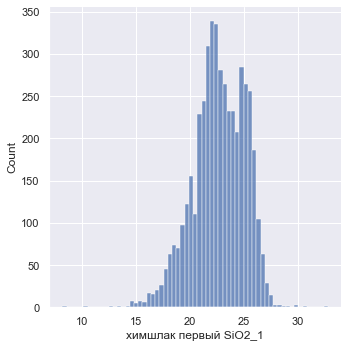

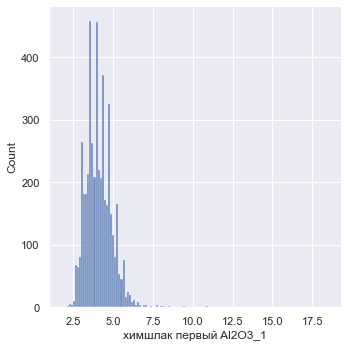

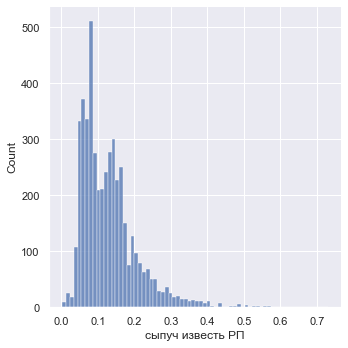

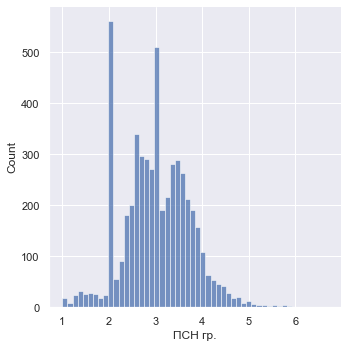

In [21]:
top_missing_features = ['химшлак первый SiO2_1', 'химшлак первый Al2O3_1',
                        'сыпуч известь РП', 'ПСН гр.']

for feature in top_missing_features:
    sns.displot(dataset[feature])
    print(feature)
    print("Min: {}, max: {}".format(dataset[feature].min(), dataset[feature].max()))
    print("Mean: {}, median: {}, mode: {}, std: {}".format(dataset[feature].mean(),
                                                           dataset[feature].median(),
                                                           dataset[feature].mode()[0],
                                                           dataset[feature].std()))
    print("Number of NaN: {}".format(dataset[feature].isna().sum()))
    print()

#### Заполнение средними

In [22]:
def fill_na_with_mean(df):
    df = df.copy()
    for column in df.columns:
        df[column].fillna(df[column].mean(), inplace=True)
    return df


dataset[numerical_features] = fill_na_with_mean(dataset[numerical_features])

print("осталось {} пустых значений".format(dataset[numerical_features].isna().sum().sum()))

осталось 0 пустых значений


### Удаление выбросов

Удалим выбросы с помощью Isolation Forest

In [23]:
numerical_features = list_numerical_features(dataset.drop(target_features, axis=1))

isfor = IsolationForest()
isfor.fit(dataset[numerical_features])
isfor_pred = isfor.predict(dataset[numerical_features])

dataset = dataset[isfor_pred==1]
print("Размер датасета на текущий момент: {}".format(dataset.shape))

Размер датасета на текущий момент: (6237, 73)


### Количество уникальных значений и вариация

Посмотрим на вещественные признаки с точки зрения количества уникальных значений:

In [24]:
make_description(dataset[numerical_features]).sort_values('nunique')

,num of NaN,dtypes,nunique,% unique
произв количество обработок,0,float64,3,0.000481
химсталь первый Al_1,0,float64,4,0.000641
химсталь последний Ti,0,float64,5,0.000802
ферспл CaC2,0,float64,7,0.001122
химсталь первый Ti_1,0,float64,7,0.001122
химсталь последний Al,0,float64,13,0.002084
химсталь первый P_1,0,float64,16,0.002565
химсталь первый N_1,0,float64,17,0.002726
химсталь последний P,0,float64,18,0.002886
химсталь последний N,0,float64,18,0.002886


5 признаков имеют совсем небольшое число уникальных значений, рассмотрим их:

In [25]:
top_low_unique_features = ['произв количество обработок', 
                           'химсталь последний Ti',
                           'химсталь первый Al_1',
                           'химсталь первый Ti_1',
                           'ферспл CaC2']

for feature in top_low_unique_features:
    print(dataset[feature].value_counts())
    print()

1.0    6206
2.0      28
3.0       3
Name: произв количество обработок, dtype: int64

0.003    4723
0.002     935
0.004     527
0.001      43
0.005       9
Name: химсталь последний Ti, dtype: int64

0.002    4579
0.001    1488
0.003     162
0.004       8
Name: химсталь первый Al_1, dtype: int64

0.002    3678
0.001    2299
0.003     250
0.004       7
0.007       1
0.005       1
0.000       1
Name: химсталь первый Ti_1, dtype: int64

0.020000    6011
0.020086     184
0.030000      22
0.010000       8
0.020000       6
0.050000       4
0.040000       2
Name: ферспл CaC2, dtype: int64



Дальнейшие действия зависят от интерпретации полученного результата. Пока что попробуем просто удалить столбец, т.к. почти все объекты принадлежат классу "1", количество объектов других классов <1%.

In [26]:
dataset = dataset.drop(['произв количество обработок'], axis=1)

# Итог

In [27]:
dataset.shape

(6237, 72)

In [28]:
make_description(dataset[target_features])

,num of NaN,dtypes,nunique,% unique
химшлак последний Al2O3,1623,float64,68,0.010903
химшлак последний CaO,0,float64,227,0.036396
химшлак последний FeO,0,float64,15,0.002405
химшлак последний MgO,1,float64,191,0.030624
химшлак последний MnO,0,float64,55,0.008818
химшлак последний R,0,float64,15,0.002405
химшлак последний SiO2,1623,float64,116,0.018599


# Выводы

Исходный размер датасета - 7041 объект и 84 признака, среди которых 7 целевых признаков.

В процессе анализа и предобработки были выполнены следующие действия:

- Удалены признаки "nplv" и "DT", как не несущие в себе какой-либо полезной информации
- Удалены признаки, в которых >33% пропусков
- Удалены объекты, у которых пропущено >33% признаков
- У категориальных признаков значения, число которых <20% были объединены в одну категорию rare:
  - У признака "МАРКА" осталось 3 значения
  - У признака "ПРОФИЛЬ" осталось 2 значения
- Категориальные признаки были закодированы методом OHE
- Оставшиеся NaN в вещественных признаках были заполнены средними
- Выбросы были удалены с помощью Isolation Forest
- Был удален признак 'произв количество обработок', т.к. его можно было отнести к категориальному и большая часть значений принадлежала одному классу

В результате был получен датасет размером (6237, 72), в котором отсутствуют пропуски в независимых признаках. В зависимых (целевых) признаках объекты с пропусками будут удаляться на следующем этапе отдельно для каждой модели.

# Выгрузка выборки

In [29]:
dataset.to_csv('preprocessed_data.csv')